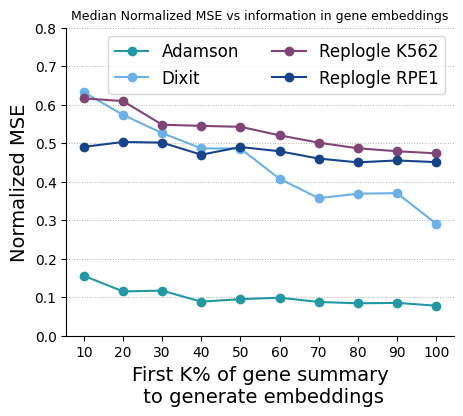

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# fmt: off
metric_ds = []
for dataset in ["dixit", "adamson", "k562", "rpe1"]:
    metric_props = []
    for prop in range(1, 11):
        proportion = prop * 10
        path = f"../extra/ablation_truncate/results/{dataset}/Proportion_{proportion}.csv"
        df = pd.read_csv(path, index_col=0)
        metric = df.drop(columns=["split"]).median()
        metric = pd.DataFrame(metric, columns=[prop]).T.assign(Proportion=proportion)
        metric_props.append(metric)
    metric_ds.append(pd.concat(metric_props).assign(Dataset=dataset))
metric_ds = pd.concat(metric_ds)

metric_ds['Dataset'] = metric_ds['Dataset'].replace({
    'dixit': 'Dixit',
    'adamson': 'Adamson',
    'k562': 'Replogle K562', 
    'rpe1': 'Replogle RPE1'
})
colors = ["#2198a4", "#6bb1e9", "#814476", "#16448a"]
metric_pivot = metric_ds.pivot(index="Proportion", columns="Dataset", values="NormMSE")
metric_pivot.plot(marker="o", linestyle="-", color=colors, figsize=(5, 4))
plt.xlabel("First K% of gene summary\n to generate embeddings", fontsize=14)
plt.xticks(range(10, 110, 10))
plt.ylabel("Normalized MSE", fontsize=14)
plt.ylim(0, 0.8)
plt.title("Median Normalized MSE vs information in gene embeddings", fontsize=9)
plt.legend(ncol=2, fontsize=12, loc='upper right')
plt.grid(axis='y', linestyle=':', linewidth=0.7)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()